In [1]:
import pandas as pd
# import numpy as np
# import nltk
# from keras.preprocessing.text import Tokenizer
# import matplotlib.pyplot as plt

In [2]:
names = ["ID", "App", "Sentiment", "Comment"]
data = pd.read_csv("twitter_training.csv", names=names)
data.sample(3)

,ID,App,Sentiment,Comment
67453,7152,johnson&johnson,Negative,Create a problem for which you already have a ...
27620,1156,AssassinsCreed,Positive,"Wow, Assassin's Creed Ronin looks fantastic!!!"
66877,7051,johnson&johnson,Neutral,Daily News Briefing.. Johnson & Johnson announ...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   App        74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Comment    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [3]:
N = 10000
texts = data.values[:, 3].astype(str)[:N]
y = data.values[:N, 2]

In [4]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

In [6]:
models = {
    "LGR": LogisticRegression(),
    "SVM": SVC(kernel="linear")
}
modes = ["binary", "count", "tfidf"]

In [7]:
tokernizer = Tokenizer()

In [8]:
def model_1gram(model, token_mode):    
    md = models[model]    
    # training set
    tokernizer.fit_on_texts(texts)
    X = tokernizer.texts_to_matrix(texts=texts, mode=token_mode) 
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)
    
    # fitting                                                
    md.fit(X_train, y_train)

    # predicting
    y_pred = md.predict(X_test)
    # print(y_pred)
    mae_score = mae(y_pred, y_test)
    
    return [md, tokernizer, mae_score]

In [10]:
customed_model = []

for tmode in modes:
    customed_model.append(model_1gram(model="LGR", token_mode=tmode))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [38]:
customed_model[0][2]

0.186

In [43]:
maes = [x[2] for x in customed_model]
x = np.arange(len(maes))

<BarContainer object of 3 artists>

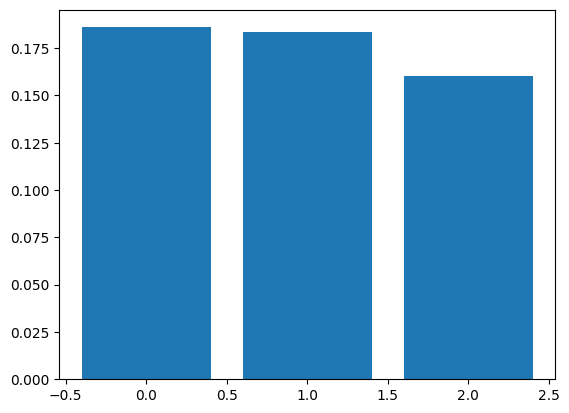

In [44]:
fig, ax = plt.subplots(1,1)
ax.bar(x, maes)